<a href="https://colab.research.google.com/github/suprnrdy/mlcourse-02-stock-prediction/blob/master/02_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 2 of Siraj Machine Learning Course: 

**Homework**

The homework for this week is to build 3 different types of regression lines to predict stock prices using Python, then print out the prediction for the best performing one.

**Step 1** - Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL  

**Step 2** - Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7  as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

**Step 3** - Visualize your result using matplotlib or another plotting library of your choice

Once your code is complete, upload it to GitHub and send the github link to gradedhomeworkassignments@gmail.com with your full name as the subject line.  Good luck!



In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(1980, 12, 12)
end = datetime.datetime(2019, 9, 4)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002


In [0]:
# Rolling Mean
close_px = df['Adj Close']

mavg = close_px.rolling(window=100).mean()


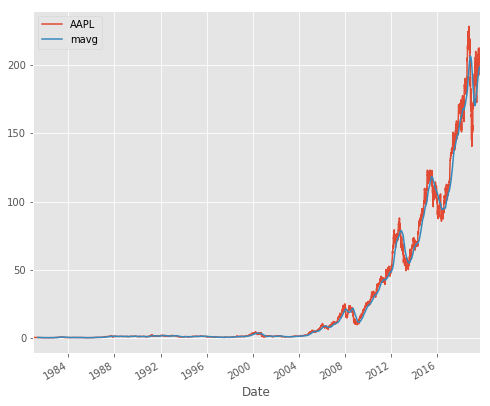

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#adjusting the size for matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8,7))
mpl.__version__

#adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

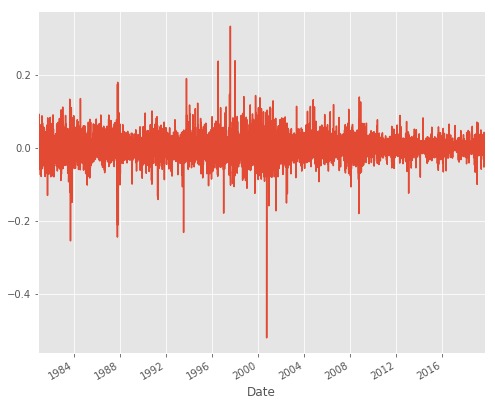

In [0]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='returns')

In [0]:
dfcomp = web.DataReader(['AAPL', 'GOOG', 'AMZN', 'MSFT', 'FB'], 'yahoo', start=start, end=end)['Adj Close']

In [0]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

Text(0, 0.5, 'Returns FB')

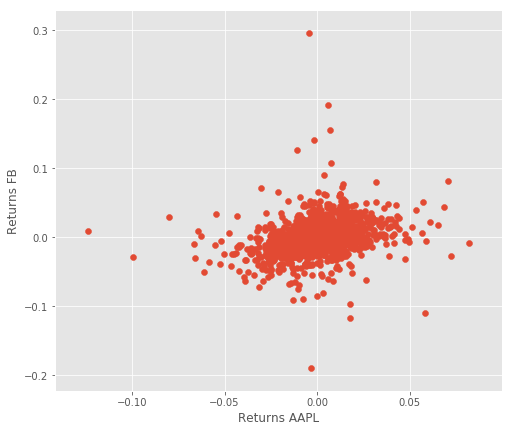

In [0]:
plt.scatter(retscomp.AAPL, retscomp.FB)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns FB')

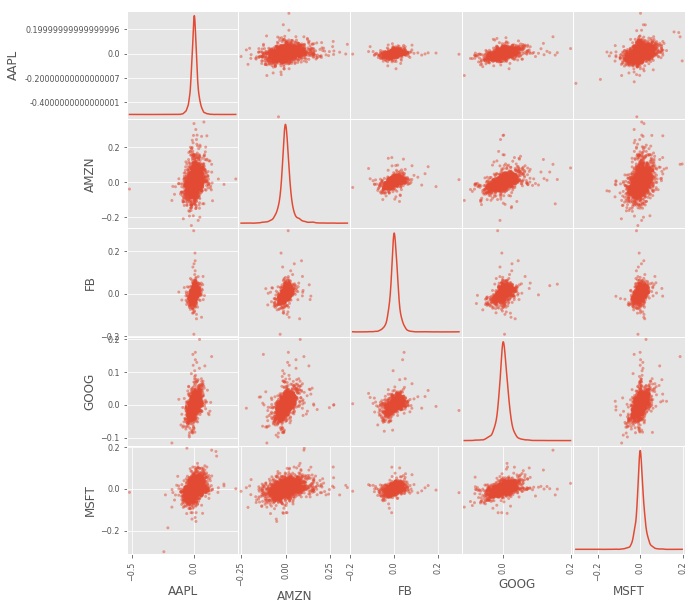

In [0]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde',figsize=(10,10));

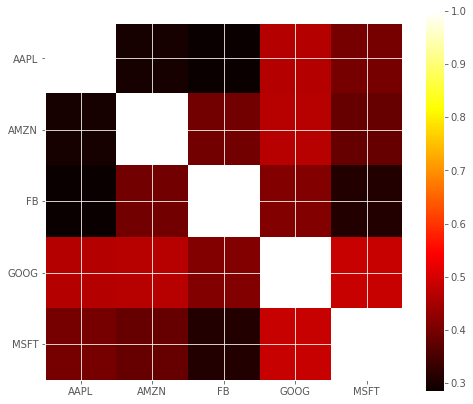

In [0]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns);

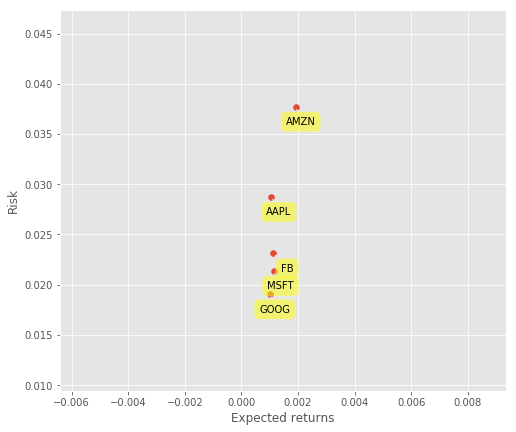

In [0]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [0]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low'])/df['Close']*100
dfreg['PCT_Change'] = (df['Close'] - df['Open'])/df['Open']*100
dfreg.tail(10)

,Adj Close,Volume,HL_PCT,PCT_Change
Date,,,,
2019-08-21,212.639999,21535400.0,0.964065,-0.164330
2019-08-22,212.460007,22253700.0,1.736799,-0.342416
2019-08-23,202.639999,46818000.0,5.453022,-3.242130
2019-08-26,206.490005,26043600.0,1.031529,0.306036
2019-08-27,204.160004,25873300.0,2.458858,-1.780043
2019-08-28,205.529999,15938800.0,1.167710,0.700633
2019-08-29,209.009995,20990500.0,1.272668,0.244602
2019-08-30,208.740005,21143400.0,1.556961,-0.675675
2019-09-03,205.699997,20023000.0,1.341757,-0.353629


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm


# Drop missing values
dfreg.fillna(value=-9999,inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print(len(X))
print(len(dfreg))

9666
9764


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [0]:
dfreg.dtypes


Adj Close     float64
Volume        float64
HL_PCT        float64
PCT_Change    float64
label         float64
dtype: object

In [0]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2),Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3),Ridge())
clfpoly3.fit(X_train, y_train)

#knn Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.9675987757363649
0.9730661710855061
0.9742137249711154
0.9753810497726508


In [0]:
#print stock forecasts
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

print(forecast_set)

[207.77368079 211.50551843 212.74420816 213.276615   216.15680125
 216.18136956 214.04280349 212.98903372 213.44144839 209.05942208
 219.07324158 217.80564025 220.92442492 216.98993006 210.95236633
 211.44356004 208.96971345 205.91596035 193.87637532 197.30555619
 199.40176147 198.88824439 197.67688599 191.52953396 195.30406618
 191.34221079 188.18294097 187.28886515 186.67891391 185.67478208
 186.75862255 183.32162952 180.64404163 187.69356635 190.97067891
 193.84778465 198.5346779  201.46087207 204.01083453 203.31415693
 203.17884074 201.68687028 202.95891185 207.37289495 207.15596065
 208.81366001 208.15060146 207.98506141 204.52726976 209.01247414
 209.19770991 207.25316164 210.80444117 212.34171853 214.08086555
 213.83982428 209.34095519 210.65117277 212.80170594 211.18046327
 212.93169519 214.90888712 214.05143222 212.97019921 215.33383837
 211.82435793 216.7472846  218.73075791 218.49090975 216.68385471
 217.43336729 219.52577333 218.51655802 221.95019053 216.89374305
 213.26310

In [0]:
print(dfreg.tail(forecast_out))
print(forecast_out)

             Adj Close      Volume    HL_PCT  PCT_Change  label  Forecast
Date                                                                     
2019-04-16  197.734344  25696400.0  1.410287   -0.105288    NaN       NaN
2019-04-17  201.584839  28906800.0  2.348252    1.799144    NaN       NaN
2019-04-18  202.309296  24195800.0  0.799563    0.364319    NaN       NaN
2019-04-22  202.974197  19439500.0  1.271210    0.838139    NaN       NaN
2019-04-23  205.901749  23323000.0  1.855604    1.491955    NaN       NaN
2019-04-24  205.584183  17540600.0  0.690284   -0.096449    NaN       NaN
2019-04-25  203.718491  18543200.0  1.286048   -0.749409    NaN       NaN
2019-04-26  202.745941  18649100.0  1.409694   -0.292821    NaN       NaN
2019-04-29  203.053589  22204700.0  1.031230    0.102743    NaN       NaN
2019-04-30  199.143539  46534900.0  2.137835   -1.176992    NaN       NaN
2019-05-01  208.918625  64827300.0  2.888087    0.304936    NaN       NaN
2019-05-02  207.559052  31996300.0  2.

98


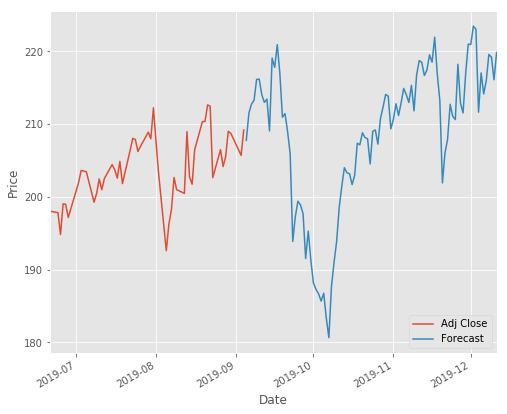

In [0]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

print(len(forecast_set))

for i in forecast_set:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
  
dfreg['Adj Close'].tail(150).plot()
dfreg['Forecast'].tail(150).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
